<a href="https://colab.research.google.com/github/Naseem-tahir123/AI-ML/blob/main/Neural_Network_Using_Keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Dummy Data Set**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
x_train_data = np.random.random((1000, 10))
y_train_data = np.random.randint(2, size = (1000, 1))


In [ ]:
# Building the model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim = 10))
model.add(Dense(1, activation= 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train_data, y_train_data, epochs = 10 , batch_size=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5326 - loss: 0.6922
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5329 - loss: 0.6915
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5203 - loss: 0.6942
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5294 - loss: 0.6898
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5364 - loss: 0.6909
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5084 - loss: 0.6903
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 0.6855
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5588 - loss: 0.6863
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5705 - loss: 0.6833
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 0.6814


In [ ]:
# Generate some dummy test data
x_test_data = np.random.random((100, 10))
y_test_data = np.random.randint(2, size = (100, 1))

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_data, y_test_data)
print(f'Test Loss: {loss}, \n Test Accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5865 - loss: 0.6886  
Test Loss: 0.6900213360786438, 
 Test Accuracy: 0.5600000023841858


# **Using Real Data Set**

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print(f"Number of Patients with outcome 1: {data.Outcome.sum()}")
print(f"Event Rate: {round(data.Outcome.mean()*100, 2)} %")

Number of rows: 768
Number of columns: 9
Number of Patients with outcome 1: 268
Event Rate: 34.9 %


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = data.to_numpy()[:,0:8  ]
y = data.to_numpy()[:, 8]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(f"Shape of Train data: {train_X.shape}")
print(f"Shape of Test data: {test_X.shape}")

Shape of Train data: (576, 8)
Shape of Test data: (192, 8)


# **Define the model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(24, input_dim=(8), activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 24)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_X, train_y, epochs=110, batch_size=132, verbose=1)

Epoch 1/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7260 - loss: 0.5889 
Epoch 2/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7374 - loss: 0.5904  
Epoch 3/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7222 - loss: 0.5908  
Epoch 4/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7335 - loss: 0.5978  
Epoch 5/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.5539 
Epoch 6/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7098 - loss: 0.5847 
Epoch 7/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7442 - loss: 0.5929 
Epoch 8/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 0.5629 
Epoch 9/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7322 - loss: 0.5928 
Epoch 10/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7255 - loss: 0.5994 
Epoch 11/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.5689 
Epoch 12/110
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - 

In [ ]:
scores = model.evaluate(test_X, test_y)
print(f'{model.metrics_names[1]}: {round(scores[1]*100,2)} %')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.7599  
compile_metrics: 70.83 %


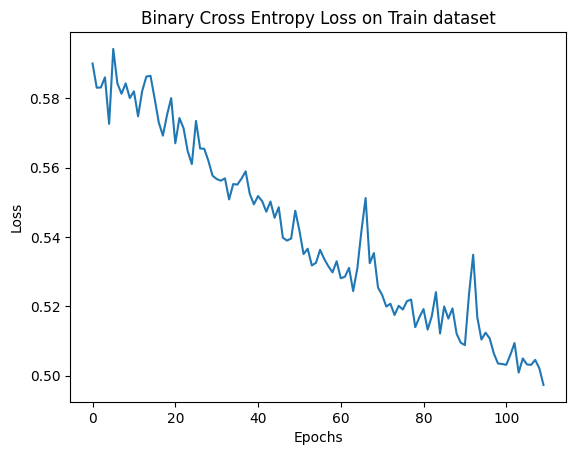

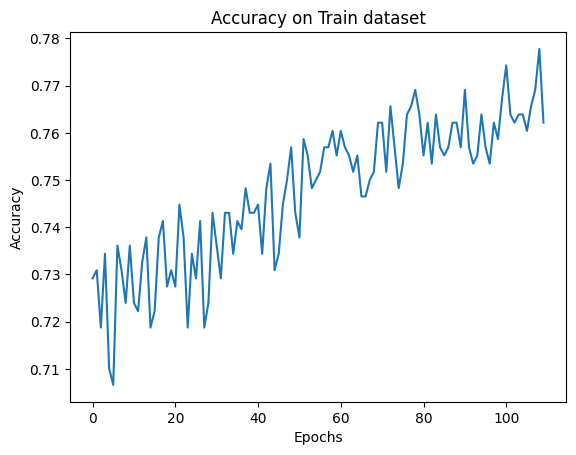

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


plt.plot(history.history['accuracy'])
plt.title('Accuracy on Train dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()